In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv("/content/drive/MyDrive/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Transactions.csv")

In [4]:
# Display basic information about the datasets
def overview():
    print("Customers Dataset Overview:")
    print(customers.info())
    print(customers.head(), "\n")

    print("Products Dataset Overview:")
    print(products.info())
    print(products.head(), "\n")

    print("Transactions Dataset Overview:")
    print(transactions.info())
    print(transactions.head(), "\n")

In [5]:
# Data Cleaning
def data_cleaning():
    # Check for missing values
    print("Missing Values in Customers:")
    print(customers.isnull().sum())

    print("Missing Values in Products:")
    print(products.isnull().sum())

    print("Missing Values in Transactions:")
    print(transactions.isnull().sum())

    # Convert date columns to datetime
    customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
    transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

    print("\nDate fields converted.")

In [6]:
# Exploratory Data Analysis (EDA)
def eda():
    # Customer analysis
    print("Customer Region Distribution:")
    print(customers['Region'].value_counts())
    customers['Region'].value_counts().plot(kind='bar', title='Customer Distribution by Region')
    plt.show()

    # Product analysis
    print("Product Category Distribution:")
    print(products['Category'].value_counts())
    products['Category'].value_counts().plot(kind='bar', title='Product Distribution by Category')
    plt.show()

    print("Price Distribution:")
    sns.histplot(products['Price'], bins=20, kde=True)
    plt.title('Product Price Distribution')
    plt.show()

     # Transaction analysis
    print("Transaction Trends Over Time:")
    transactions['TransactionDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line', title='Monthly Transaction Trends')
    plt.show()

    print("Top Products by Quantity Sold:")
    top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
    print(top_products)
    top_products.plot(kind='bar', title='Top 10 Products by Quantity Sold')
    plt.show()


In [7]:
# Merging datasets for combined analysis
def combined_analysis():
    combined = pd.merge(transactions, customers, on='CustomerID', how='left')
    combined = pd.merge(combined, products, on='ProductID', how='left')

    print("Revenue by Region:")
    revenue_region = combined.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
    print(revenue_region)
    revenue_region.plot(kind='bar', title='Revenue by Region')
    plt.show()

    print("Revenue by Category:")
    revenue_category = combined.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
    print(revenue_category)
    revenue_category.plot(kind='bar', title='Revenue by Product Category')

Customers Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  ---

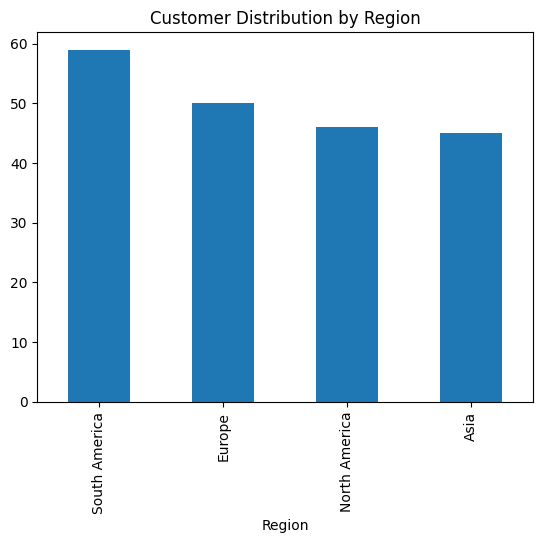

Product Category Distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


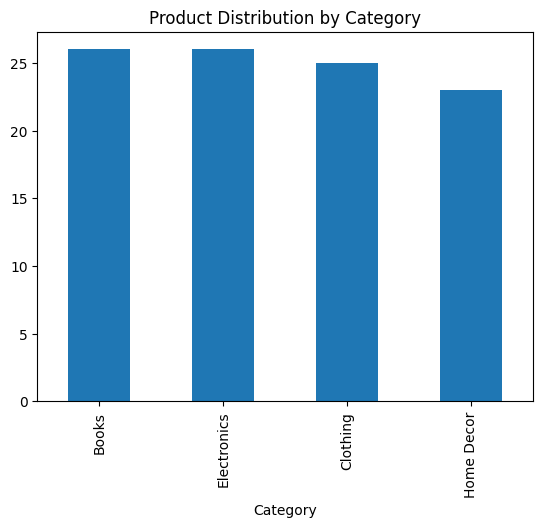

Price Distribution:


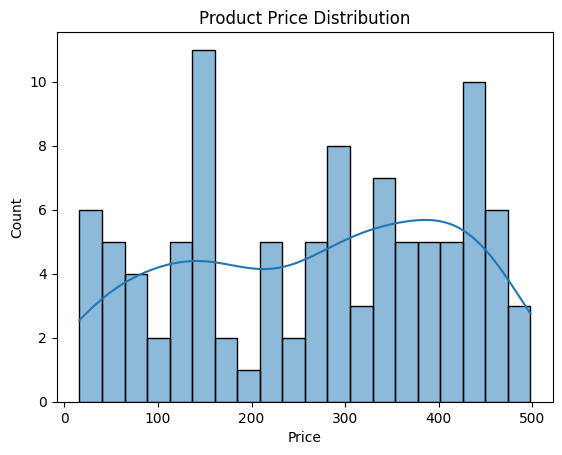

Transaction Trends Over Time:


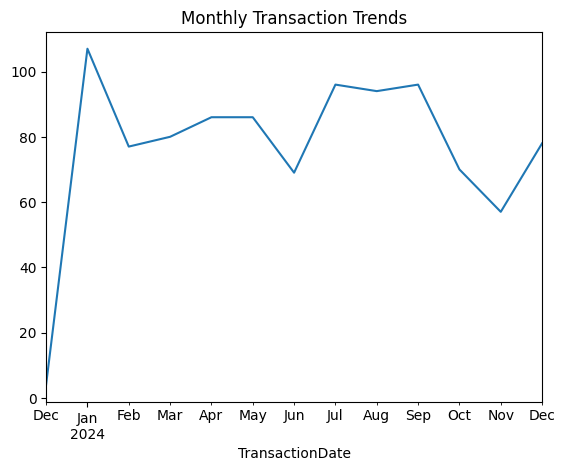

Top Products by Quantity Sold:
ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


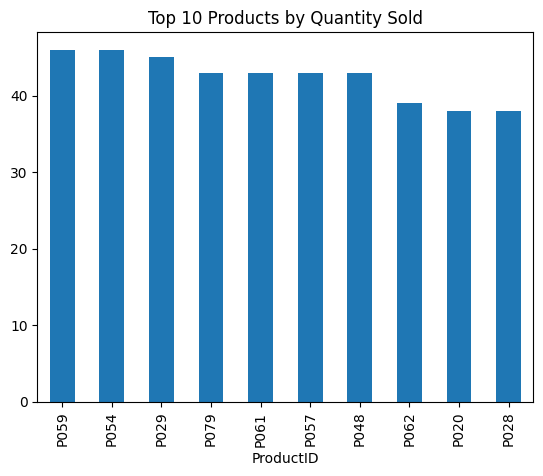

Revenue by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


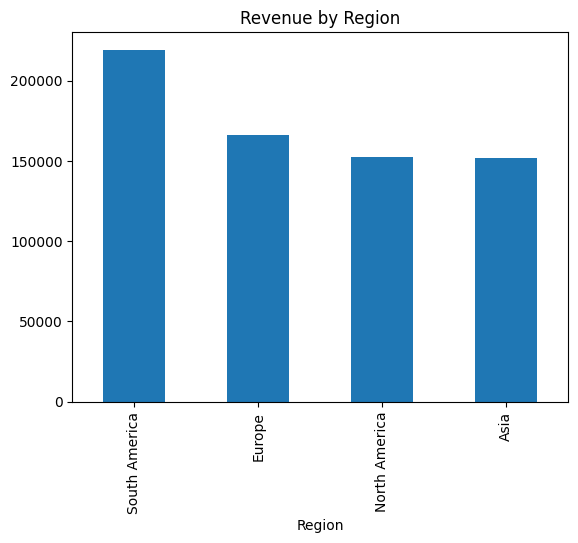

Revenue by Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


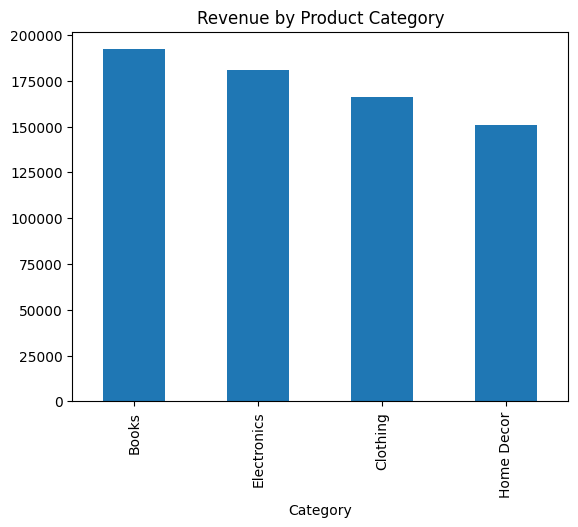

In [8]:
# Main function
def main():
    overview()
    data_cleaning()
    eda()
    combined_analysis()

if __name__ == "__main__":
    main()
